#Preprocessing

Preprocessing in Python refers to the preparatory steps applied to raw data before using it for analysis or modeling. These steps may include cleaning data, handling missing values, scaling or normalizing features, encoding categorical variables, and splitting data into training and testing sets. Preprocessing is crucial for ensuring data quality and compatibility with machine learning algorithms, ultimately improving the accuracy and reliability of analytical results.

In [610]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [611]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [612]:
#Loading the data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NaturalDisastersDSAProject/Preprocessing/final_data.csv")

In [613]:
data.head()

,Unnamed: 0,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Magnitude,Magnitude Scale,Start Year,Total Deaths,Total Affected,CPI
0,0,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,NaN,NaN,1900,30.0,NaN,2.730451
1,1,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,5.9,Richter,1900,140.0,NaN,2.730451
2,2,Climatological,Drought,Drought,IND,India,Southern Asia,NaN,Km2,1900,1250000.0,NaN,2.730451
3,3,Geophysical,Earthquake,Tsunami,JPN,Japan,Eastern Asia,7.9,Richter,1901,18.0,24.0,2.730451
4,4,Meteorological,Storm,Tropical cyclone,MMR,Myanmar,South-eastern Asia,NaN,Kph,1902,600.0,NaN,2.839669


In [614]:
data.dtypes

Unnamed: 0             int64
Disaster Subgroup     object
Disaster Type         object
Disaster Subtype      object
ISO                   object
Country               object
Subregion             object
Magnitude            float64
Magnitude Scale       object
Start Year             int64
Total Deaths         float64
Total Affected       float64
CPI                  float64
dtype: object

In [615]:
#checking null values
data.isna().sum().sort_values(ascending=False)

Magnitude            4038
Total Affected       1459
Total Deaths         1264
Magnitude Scale       587
CPI                    46
Unnamed: 0              0
Disaster Subgroup       0
Disaster Type           0
Disaster Subtype        0
ISO                     0
Country                 0
Subregion               0
Start Year              0
dtype: int64

Removing the unecessary columns from the dataset and keeping the relevant ones

In [616]:
# dropping the columns
# data.drop(["Unnamed: 0","Classification Key","OFDA/BHA Response","Appeal","Declaration","AID Contribution ('000 US$)","Latitude","Longitude","Insured Damage, Adjusted ('000 US$)","Total Damage ('000 US$)","Total Damage, Adjusted ('000 US$)"],inplace = True, axis = 1)

In [617]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6457 entries, 0 to 6456
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6457 non-null   int64  
 1   Disaster Subgroup  6457 non-null   object 
 2   Disaster Type      6457 non-null   object 
 3   Disaster Subtype   6457 non-null   object 
 4   ISO                6457 non-null   object 
 5   Country            6457 non-null   object 
 6   Subregion          6457 non-null   object 
 7   Magnitude          2419 non-null   float64
 8   Magnitude Scale    5870 non-null   object 
 9   Start Year         6457 non-null   int64  
 10  Total Deaths       5193 non-null   float64
 11  Total Affected     4998 non-null   float64
 12  CPI                6411 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 655.9+ KB


In [618]:
df = pd.DataFrame(data)

In [619]:
disaster_subtype = data[["Disaster Subtype","Magnitude","Magnitude Scale"]]["Disaster Subtype"].unique()

Text(0.5, 1.0, 'Ground movement')

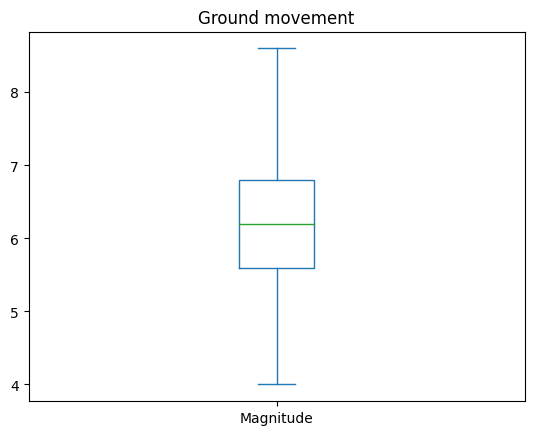

In [620]:
data[data["Disaster Subtype"] == disaster_subtype[1]]["Magnitude"].plot(kind = "box")
plt.title(disaster_subtype[1])

In [621]:
len(disaster_subtype)

36

In [622]:
disaster_subtype

array(['Ash fall', 'Ground movement', 'Drought', 'Tsunami',
       'Tropical cyclone', 'Flood (General)', 'Riverine flood',
       'Landslide (wet)', 'Storm (General)', 'Hail', 'Heat wave',
       'Flash flood', 'Avalanche (wet)', 'Cold wave', 'Landslide (dry)',
       'Lightning/Thunderstorms', 'Forest fire',
       'Land fire (Brush, Bush, Pasture)', 'Blizzard/Winter storm',
       'Tornado', 'Sand/Dust storm', 'Rockfall (dry)', 'Coastal flood',
       'Severe weather', 'Mudslide', 'Avalanche (dry)',
       'Severe winter conditions', 'Sudden Subsidence (wet)',
       'Volcanic activity (General)', 'Rockfall (wet)', 'Lava flow',
       'Storm surge', 'Wildfire (General)', 'Extra-tropical storm',
       'Glacial lake outburst flood', 'Pyroclastic flow'], dtype=object)

### Creating boxplots to identify the value range of magnitudes

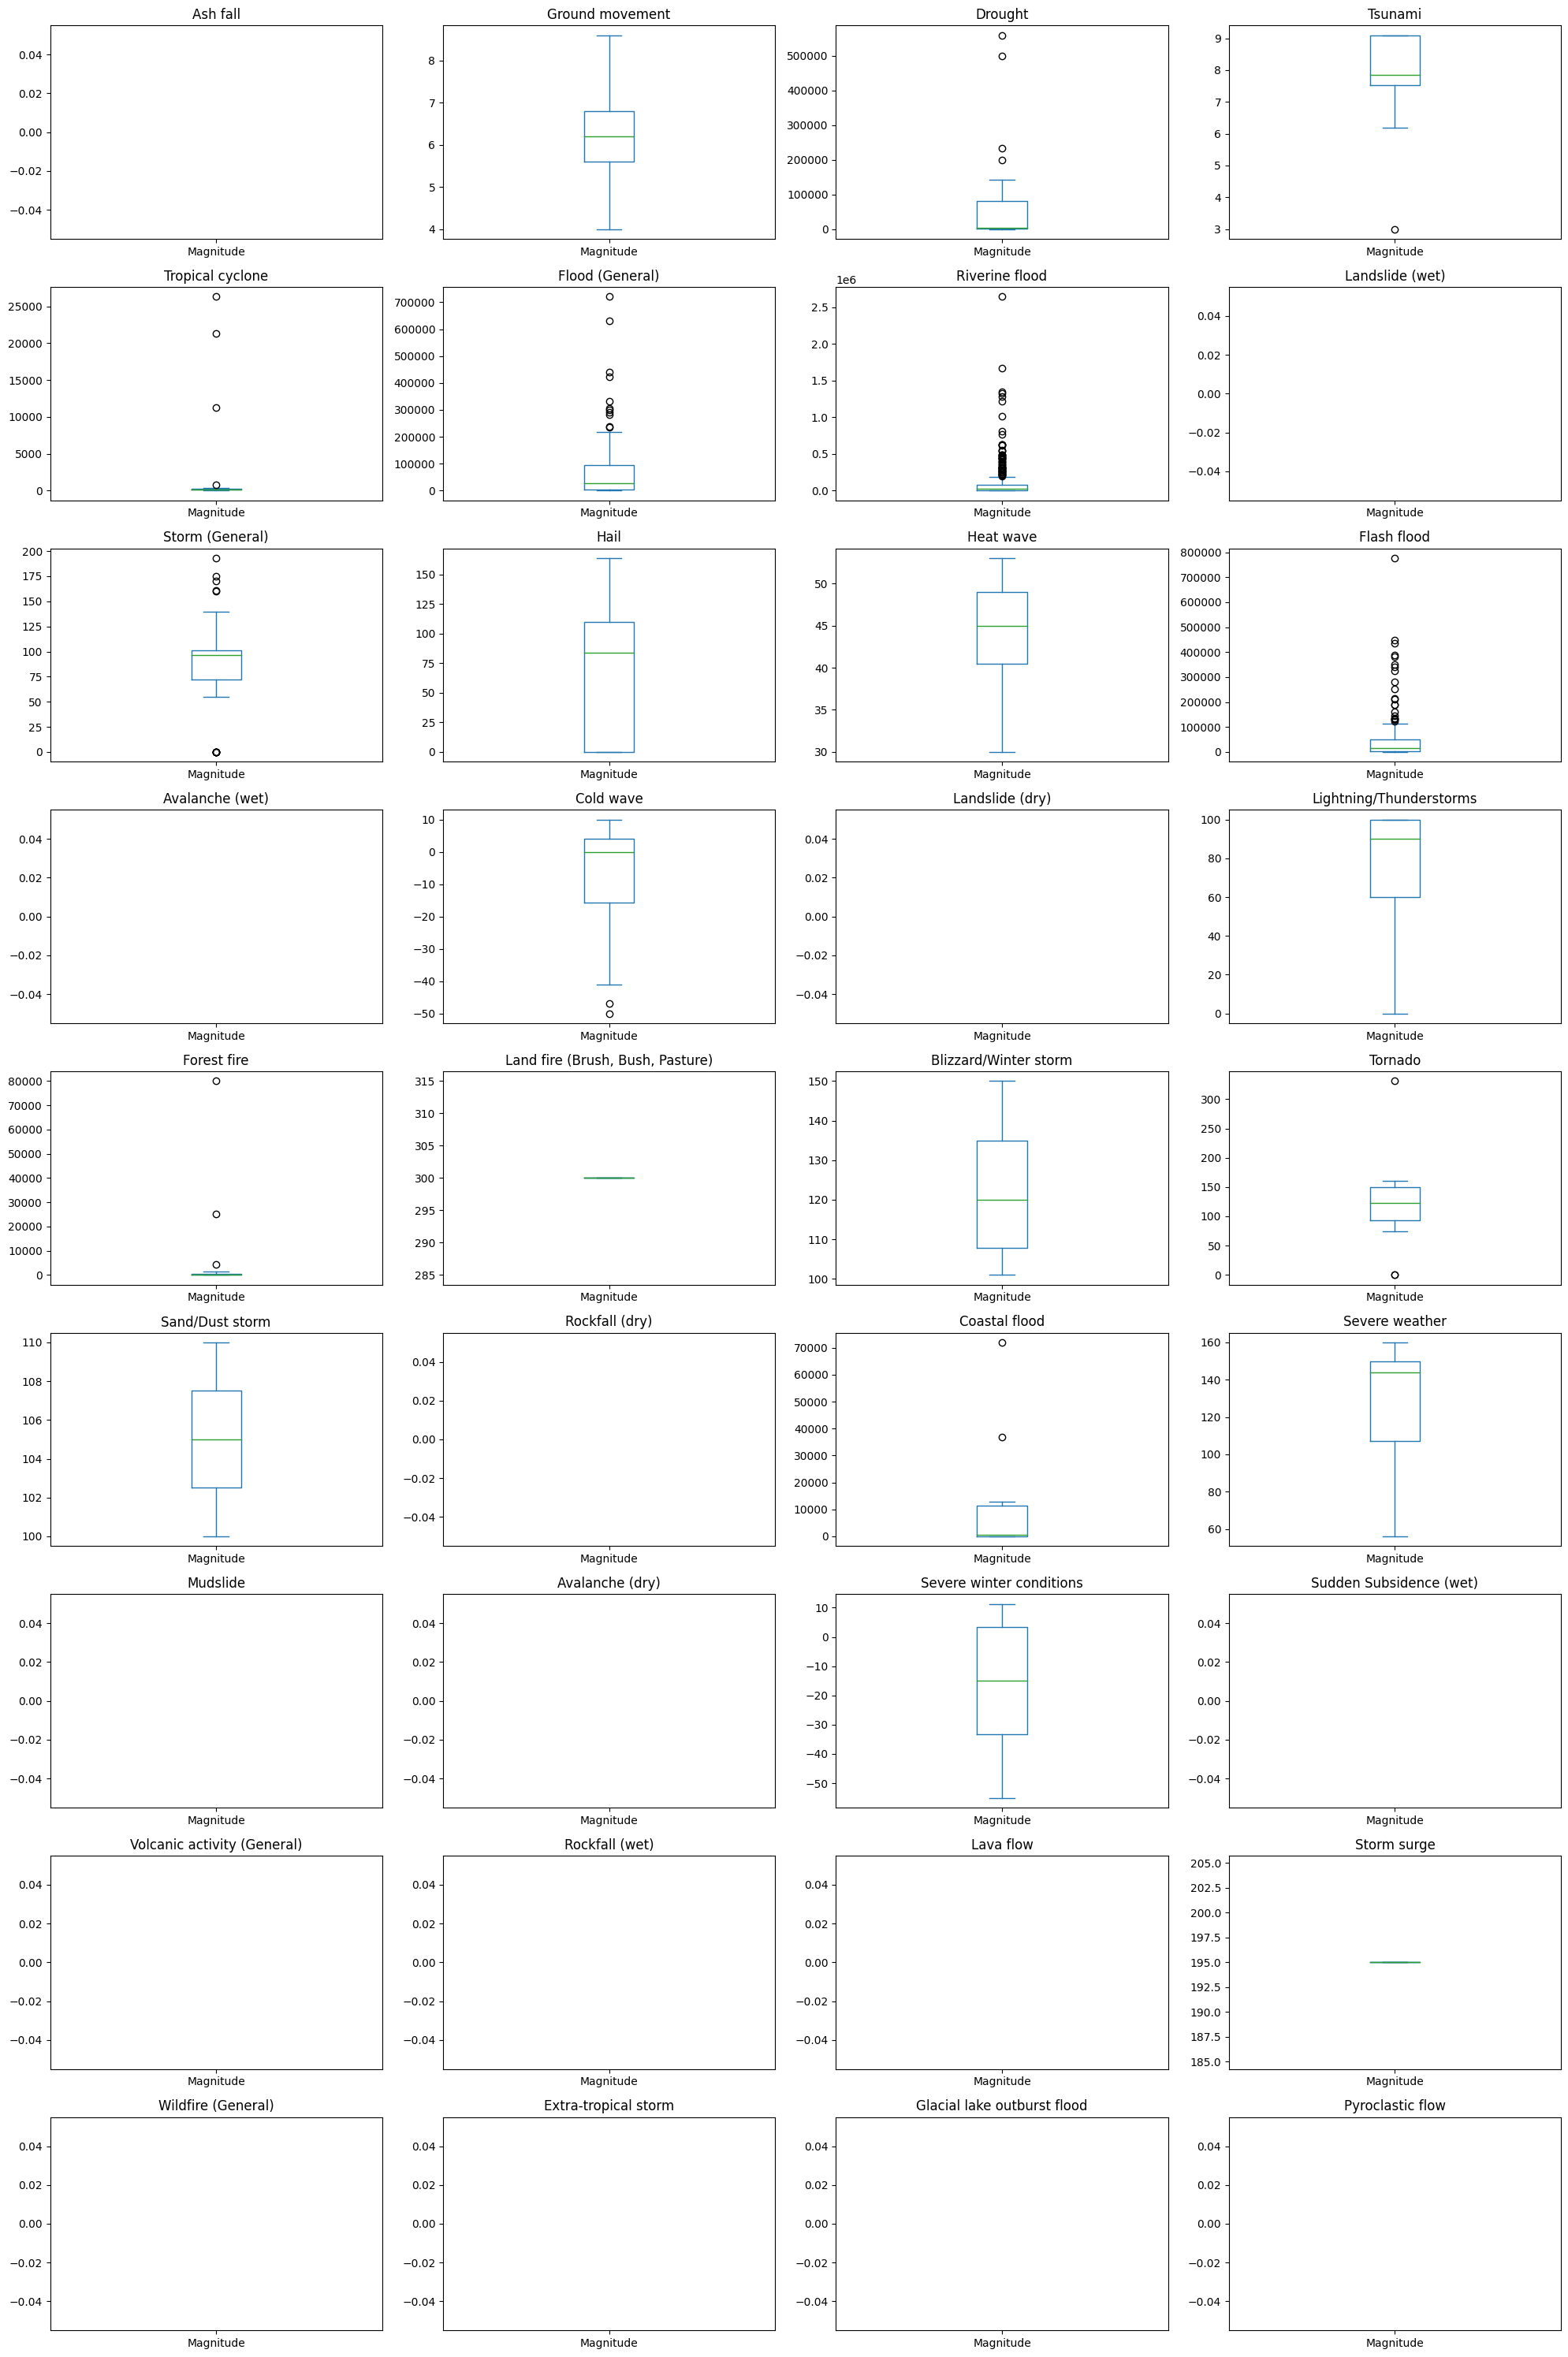

In [623]:
#Plotting boxplot for all Disaster Subtypes and checking for outliers
plt.figure(figsize=(20,30))

for index,column in enumerate(disaster_subtype):
  plt.subplot(9,4,index+1)
  data[data["Disaster Subtype"] == column]["Magnitude"].plot(kind = "box")
  plt.title(column)
  plt.tight_layout()


### Identifying the null values in each disaster subtype category

In [624]:
pd.DataFrame(data[(data['Magnitude'].isna()==True) & (data['Magnitude Scale'].isna()== True)][["Disaster Subgroup","Disaster Type","Disaster Subtype"]].value_counts())

count
Disaster Subgroup Disaster Type               Disaster Subtype                  
Hydrological      Mass movement (wet)         Landslide (wet)                346
Geophysical       Volcanic activity           Ash fall                       100
Hydrological      Mass movement (wet)         Avalanche (wet)                 70
                                              Mudslide                        29
Geophysical       Mass movement (dry)         Landslide (dry)                 16
                  Volcanic activity           Volcanic activity (General)      6
                                              Lava flow                        5
                  Mass movement (dry)         Avalanche (dry)                  4
Climatological    Glacial lake outburst flood Glacial lake outburst flood      3
Hydrological      Mass movement (wet)         Rockfall (wet)                   3
Geophysical       Mass movement (dry)         Rockfall (dry)                   2
                  Volcanic activity           Pyroclastic flow                 2
Hydrological      Mass movement (wet)         Sudden Subsidence (wet)          1

In [625]:
# dropping the rows where magnitude and magnitude scale is na
data.drop(data[(data['Magnitude'].isna()==True) & (data['Magnitude Scale'].isna()== True)].index,inplace = True)

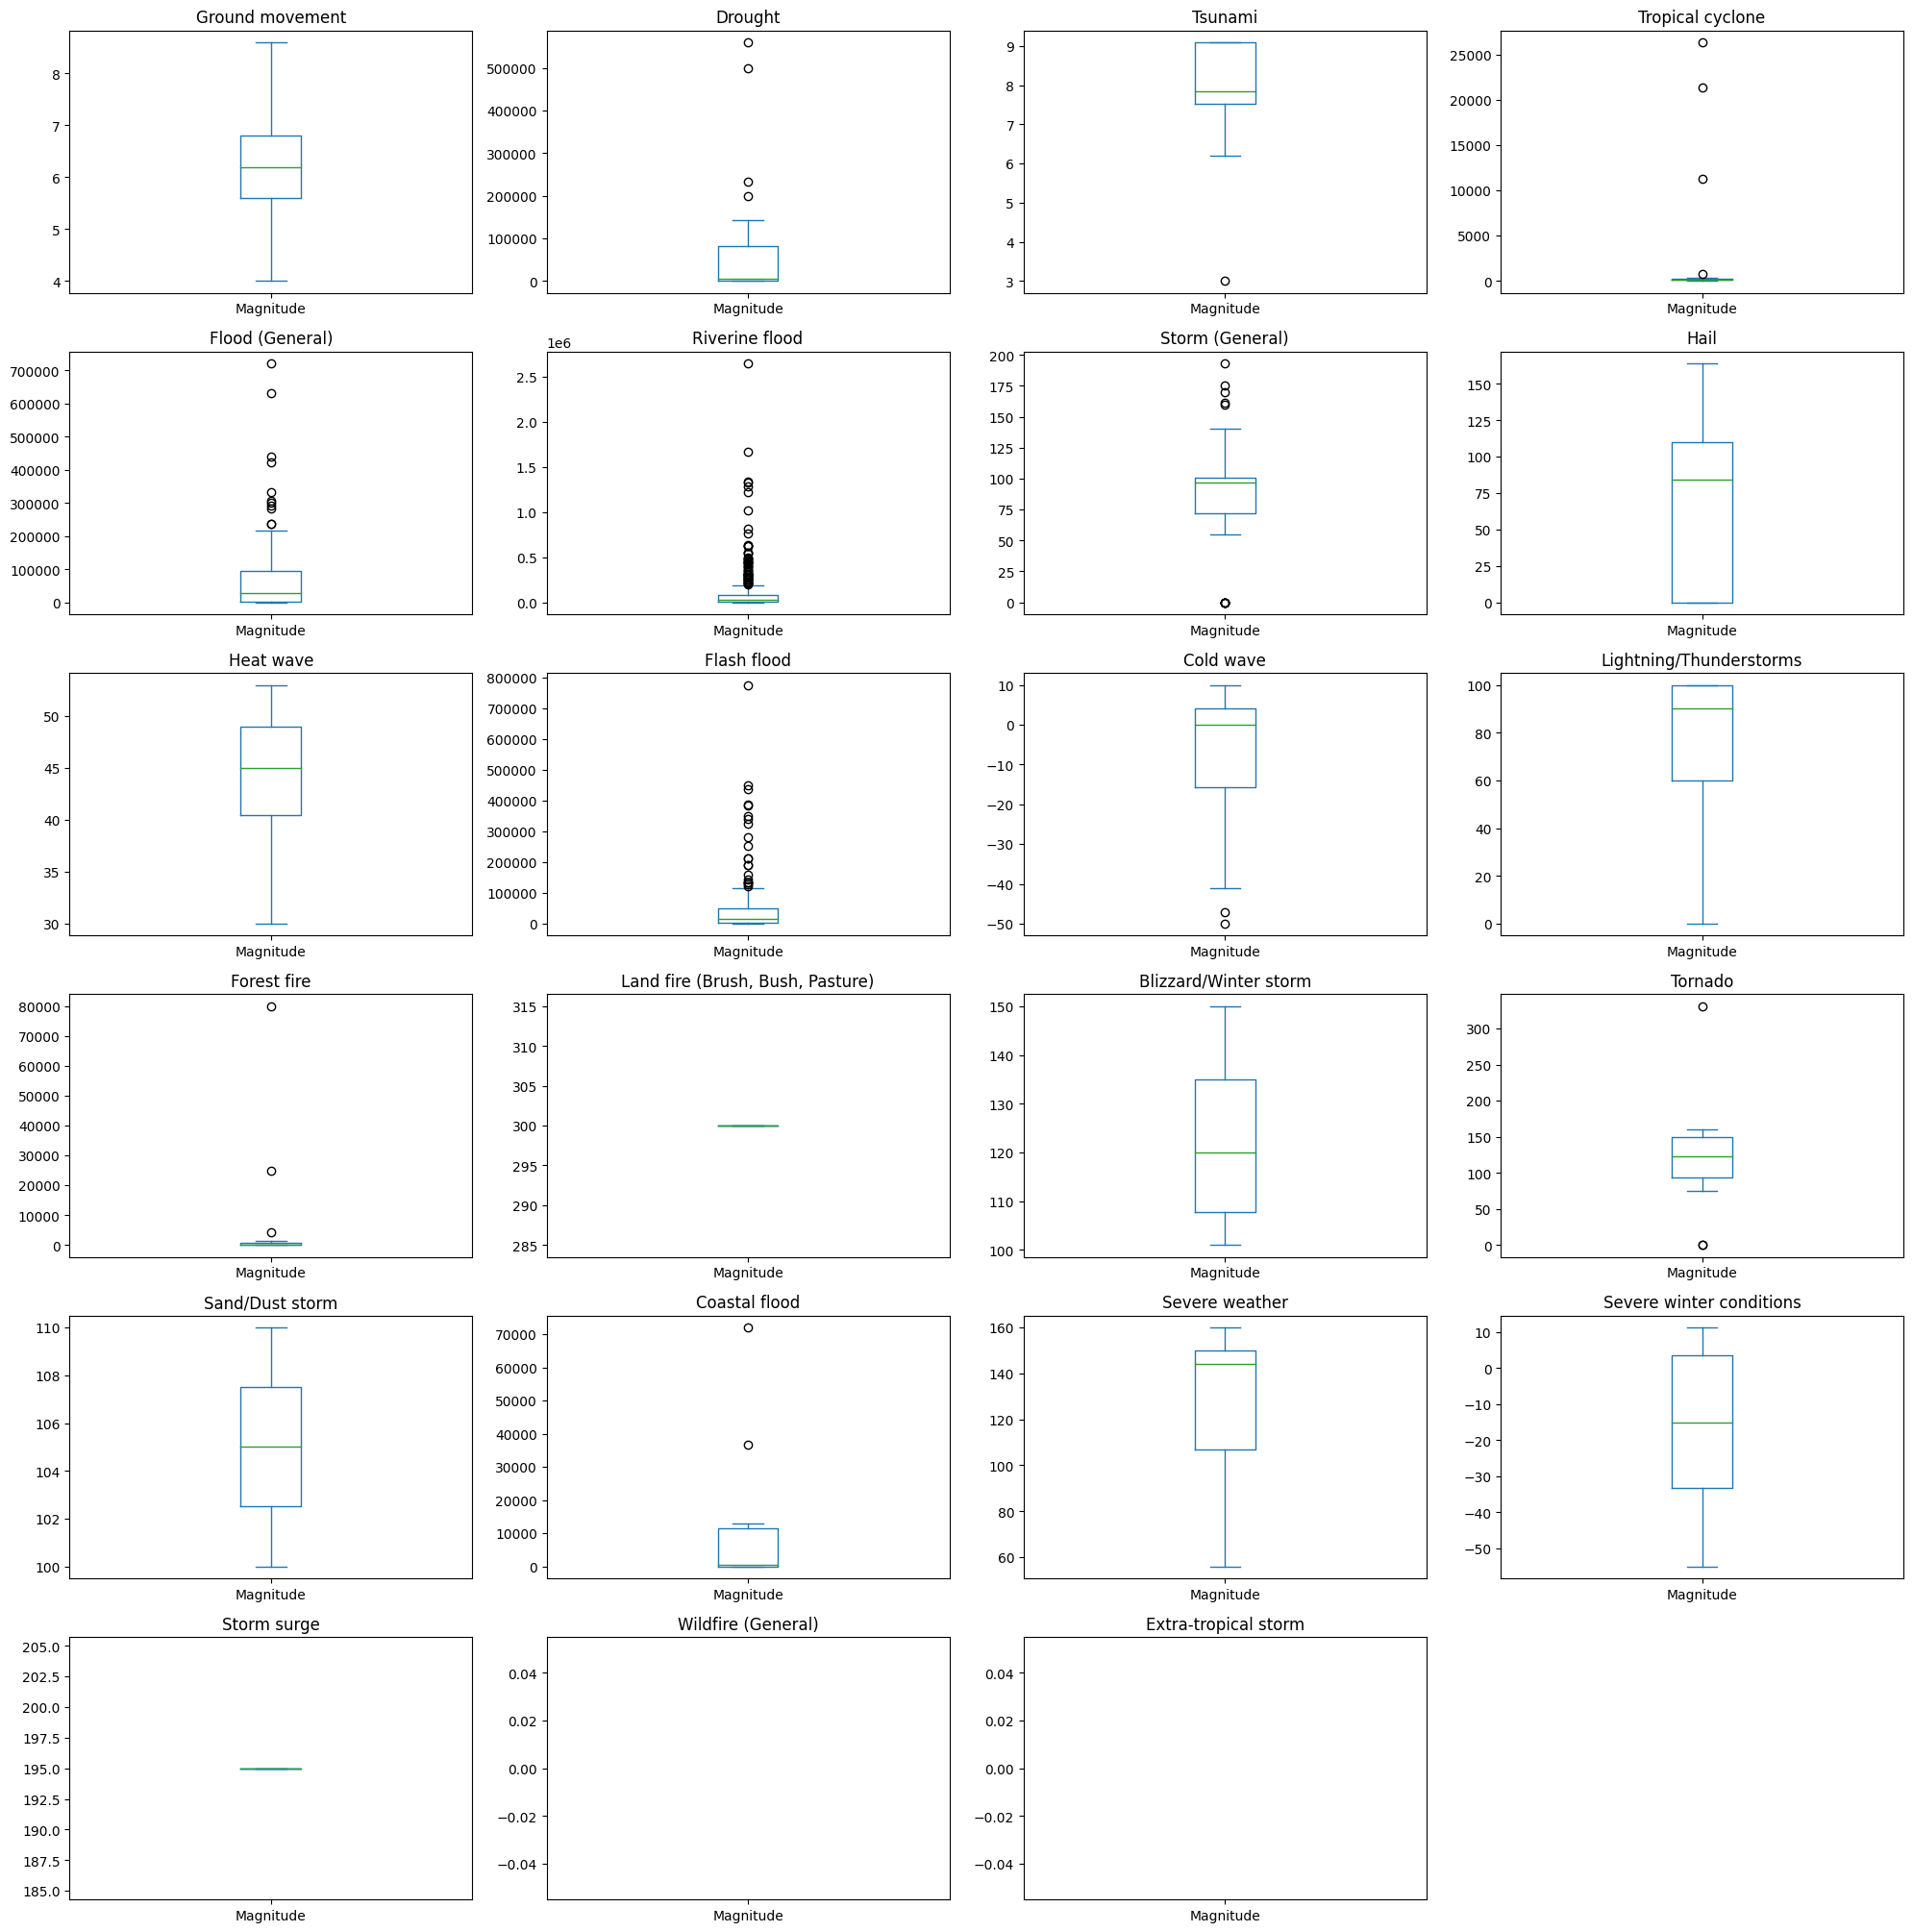

In [626]:
# Plotting the boxplots again
disaster_subtype = data[["Disaster Subtype","Magnitude","Magnitude Scale"]]["Disaster Subtype"].unique()

plt.figure(figsize=(20,30))

for index,column in enumerate(disaster_subtype):
  plt.subplot(9,4,index+1)
  data[data["Disaster Subtype"] == column]["Magnitude"].plot(kind = "box")
  plt.title(column)
  plt.tight_layout()


In [627]:
# Filtering out the columns where scale is available but magnitude is not available
data[data["Disaster Subtype"].isin(["Wildfire (General)","Extra-tropical storm"])]

,Unnamed: 0,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Magnitude,Magnitude Scale,Start Year,Total Deaths,Total Affected,CPI
5765,5765,Climatological,Wildfire,Wildfire (General),IDN,Indonesia,South-eastern Asia,NaN,Km2,2019,NaN,NaN,83.904170
5799,5799,Meteorological,Storm,Extra-tropical storm,VNM,Viet Nam,South-eastern Asia,NaN,Kph,2020,5.0,4652.0,84.939198
5896,5896,Climatological,Wildfire,Wildfire (General),ISR,Israel,Western Asia,NaN,Km2,2020,NaN,21.0,84.939198
5897,5897,Climatological,Wildfire,Wildfire (General),LBN,Lebanon,Western Asia,NaN,Km2,2020,NaN,NaN,84.939198
5898,5898,Climatological,Wildfire,Wildfire (General),SYR,Syrian Arab Republic,Western Asia,NaN,Km2,2020,3.0,140079.0,84.939198
6124,6124,Climatological,Wildfire,Wildfire (General),KOR,Republic of Korea,Eastern Asia,NaN,Km2,2022,NaN,1080.0,96.046342
6279,6279,Climatological,Wildfire,Wildfire (General),KOR,Republic of Korea,Eastern Asia,NaN,Km2,2023,1.0,500.0,100.000000
6312,6312,Climatological,Wildfire,Wildfire (General),KAZ,Kazakhstan,Central Asia,NaN,Km2,2023,14.0,300.0,100.000000
6392,6392,Meteorological,Storm,Extra-tropical storm,TUR,Türkiye,Western Asia,NaN,Kph,2023,20.0,NaN,100.000000
6436,6436,Climatological,Wildfire,Wildfire (General),CHN,China,Eastern Asia,NaN,Km2,2024,4.0,4900.0,NaN


>**In the above data, "Wildfire (General)"," Extra-tropical storm" contains only Magnitude Scale and doesn't have any magnitude value.**

In [628]:
# data.drop(data[data["Disaster Subtype"].isin(["Wildfire (General)","Extra-tropical storm"])].index, inplace=True)

In [629]:
# Filtering out the columns where magnitude is avaible for only 1 row
data[data["Disaster Subtype"].isin(["Land fire (Brush, Bush, Pasture)","Storm surge"])]

,Unnamed: 0,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Magnitude,Magnitude Scale,Start Year,Total Deaths,Total Affected,CPI
661,661,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",HKG,"China, Hong Kong Special Administrative Region",Eastern Asia,NaN,Km2,1969,NaN,NaN,12.039097
764,764,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",HKG,"China, Hong Kong Special Administrative Region",Eastern Asia,NaN,Km2,1973,NaN,NaN,14.571625
1198,1198,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",HKG,"China, Hong Kong Special Administrative Region",Eastern Asia,NaN,Km2,1982,NaN,9000.0,31.670319
1399,1399,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",MNG,Mongolia,Eastern Asia,NaN,Km2,1986,NaN,NaN,35.972344
3077,3077,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",IRN,Iran (Islamic Republic of),Southern Asia,300.0,Km2,2002,NaN,NaN,59.033144
4384,4384,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",CHN,China,Eastern Asia,NaN,Km2,2010,22.0,3.0,71.563596
5295,5295,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",ISR,Israel,Western Asia,NaN,Km2,2016,NaN,60137.0,78.767923
5651,5651,Meteorological,Storm,Storm surge,MNG,Mongolia,Eastern Asia,NaN,Kph,2019,NaN,500.0,83.904170
6205,6205,Meteorological,Storm,Storm surge,KHM,Cambodia,South-eastern Asia,NaN,Kph,2022,16.0,NaN,96.046342
6206,6206,Meteorological,Storm,Storm surge,PHL,Philippines,South-eastern Asia,195.0,Kph,2022,17.0,913945.0,96.046342


>**In the above data, "Storm surge","Land fire (Brush, Bush, Pasture)	" contains single magnitude value.**

In [630]:
# data.drop(data[data["Disaster Subtype"].isin(["Land fire (Brush, Bush, Pasture)","Storm surge"])].index, inplace=True)

In [631]:
disaster_subtype

array(['Ground movement', 'Drought', 'Tsunami', 'Tropical cyclone',
       'Flood (General)', 'Riverine flood', 'Storm (General)', 'Hail',
       'Heat wave', 'Flash flood', 'Cold wave', 'Lightning/Thunderstorms',
       'Forest fire', 'Land fire (Brush, Bush, Pasture)',
       'Blizzard/Winter storm', 'Tornado', 'Sand/Dust storm',
       'Coastal flood', 'Severe weather', 'Severe winter conditions',
       'Storm surge', 'Wildfire (General)', 'Extra-tropical storm'],
      dtype=object)

## Reloading the Dataset to perform preprocessing

In [632]:
#loading the final dataset after dropping unnecessary columns
final_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NaturalDisastersDSAProject/Preprocessing/final_data.csv')

In [633]:
final_data

,Unnamed: 0,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Magnitude,Magnitude Scale,Start Year,Total Deaths,Total Affected,CPI
0,0,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,NaN,NaN,1900,30.0,NaN,2.730451
1,1,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,5.9,Richter,1900,140.0,NaN,2.730451
2,2,Climatological,Drought,Drought,IND,India,Southern Asia,NaN,Km2,1900,1250000.0,NaN,2.730451
3,3,Geophysical,Earthquake,Tsunami,JPN,Japan,Eastern Asia,7.9,Richter,1901,18.0,24.0,2.730451
4,4,Meteorological,Storm,Tropical cyclone,MMR,Myanmar,South-eastern Asia,NaN,Kph,1902,600.0,NaN,2.839669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6452,6452,Meteorological,Storm,Severe weather,PAK,Pakistan,Southern Asia,NaN,Kph,2024,7.0,309.0,NaN
6453,6453,Hydrological,Mass movement (wet),Landslide (wet),IDN,Indonesia,South-eastern Asia,NaN,NaN,2024,12.0,6.0,NaN
6454,6454,Meteorological,Storm,Tornado,CHN,China,Eastern Asia,331.0,Kph,2024,5.0,456.0,NaN
6455,6455,Hydrological,Mass movement (wet),Landslide (wet),CHN,China,Eastern Asia,NaN,NaN,2024,48.0,30.0,NaN


In [634]:
# Dropping the unnecessary columns
final_data.drop('Unnamed: 0',axis=1,inplace=True)

In [635]:
#checking the head and tail
final_data

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Magnitude,Magnitude Scale,Start Year,Total Deaths,Total Affected,CPI
0,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,NaN,NaN,1900,30.0,NaN,2.730451
1,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,5.9,Richter,1900,140.0,NaN,2.730451
2,Climatological,Drought,Drought,IND,India,Southern Asia,NaN,Km2,1900,1250000.0,NaN,2.730451
3,Geophysical,Earthquake,Tsunami,JPN,Japan,Eastern Asia,7.9,Richter,1901,18.0,24.0,2.730451
4,Meteorological,Storm,Tropical cyclone,MMR,Myanmar,South-eastern Asia,NaN,Kph,1902,600.0,NaN,2.839669
...,...,...,...,...,...,...,...,...,...,...,...,...
6452,Meteorological,Storm,Severe weather,PAK,Pakistan,Southern Asia,NaN,Kph,2024,7.0,309.0,NaN
6453,Hydrological,Mass movement (wet),Landslide (wet),IDN,Indonesia,South-eastern Asia,NaN,NaN,2024,12.0,6.0,NaN
6454,Meteorological,Storm,Tornado,CHN,China,Eastern Asia,331.0,Kph,2024,5.0,456.0,NaN
6455,Hydrological,Mass movement (wet),Landslide (wet),CHN,China,Eastern Asia,NaN,NaN,2024,48.0,30.0,NaN


## EM-DAT provides the same CPI for all countries in the same year, it indicates a lack of country-specific economic data, making it unsuitable for detailed economic analysis or modeling.Rely on the World Bank for CPI data as it offers country-specific CPI values based on rigorous data collection and methodologies.Extract CPI data from the World Bank for each country from 1980 onwards.

In [636]:
#loading the world bank dataset
wb_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/NaturalDisastersDSAProject/Preprocessing/wb_data.xlsx')

In [637]:
# Checking the head and tail for world bank dataset
wb_data

,Country Code,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,NaN,NaN,NaN,NaN,4.032258,1.073966,3.643045,3.121868,3.991628,...,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN,NaN
1,AFE,14.461591,12.139918,11.567524,10.983863,13.006566,13.891972,12.563443,12.522254,12.558202,...,5.370290,5.245878,6.571396,6.399343,4.720811,4.653665,7.321106,6.824727,10.773751,NaN
2,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN,NaN
3,AFW,8.799211,12.059765,10.671937,11.250000,7.354926,5.950965,0.248789,2.523659,0.869287,...,1.768436,2.130817,1.487416,1.764635,1.784050,1.760112,2.437609,3.653533,7.967574,NaN
4,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704,22.271564,25.754266,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.428958,-0.536929,0.273169,1.488234,1.053798,2.675992,0.198228,3.353691,11.580510,NaN
262,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.104726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,ZAF,15.254244,14.639032,12.303207,11.526481,16.294227,18.654919,16.160581,12.779545,14.730918,...,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672,7.039727,NaN
264,ZMB,NaN,NaN,NaN,NaN,NaN,55.828221,47.047244,51.004016,123.404255,...,7.806876,10.110593,17.869730,6.577312,7.494572,9.150316,15.733060,22.020768,10.993204,NaN


In [638]:
#filtering em-dat data from year 1980 to 2024
filtered_df =final_data[final_data["Start Year"]>1980 ]

In [639]:
# checking the unique ISO values of emdat filtered dataset
filtered_df['ISO'].values

array(['IND', 'PHL', 'LAO', ..., 'CHN', 'CHN', 'VNM'], dtype=object)

In [640]:
# assigning the country codes present in the world bank data to a variable
country_codes = wb_data['Country Code'].values

In [641]:
# Filtering the rows where country code in world bank dataset matches the country codes in world bank data
filtered_df[filtered_df['ISO'].isin(country_codes)]

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Magnitude,Magnitude Scale,Start Year,Total Deaths,Total Affected,CPI
1088,Meteorological,Extreme temperature,Cold wave,IND,India,Southern Asia,NaN,°C,1981,300.0,NaN,29.840662
1089,Hydrological,Flood,Flood (General),PHL,Philippines,South-eastern Asia,NaN,Km2,1981,228.0,300000.0,29.840662
1090,Hydrological,Flood,Flood (General),LAO,Lao People's Democratic Republic,South-eastern Asia,NaN,Km2,1981,NaN,NaN,29.840662
1091,Geophysical,Earthquake,Ground movement,IDN,Indonesia,South-eastern Asia,6.8,Richter,1981,306.0,2682.0,29.840662
1092,Geophysical,Earthquake,Ground movement,CHN,China,Eastern Asia,6.8,Richter,1981,150.0,25850.0,29.840662
...,...,...,...,...,...,...,...,...,...,...,...,...
6452,Meteorological,Storm,Severe weather,PAK,Pakistan,Southern Asia,NaN,Kph,2024,7.0,309.0,NaN
6453,Hydrological,Mass movement (wet),Landslide (wet),IDN,Indonesia,South-eastern Asia,NaN,NaN,2024,12.0,6.0,NaN
6454,Meteorological,Storm,Tornado,CHN,China,Eastern Asia,331.0,Kph,2024,5.0,456.0,NaN
6455,Hydrological,Mass movement (wet),Landslide (wet),CHN,China,Eastern Asia,NaN,NaN,2024,48.0,30.0,NaN


In [642]:
# Filtering the world bank data with the ISO codes of emdat dataset
wb_filtered_df = wb_data[wb_data['Country Code'].isin(final_data["ISO"].unique())]

In [643]:
# checking the head and tail of the above filtered data
wb_filtered_df

,Country Code,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
2,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN,NaN
8,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.346269,4.069966,1.617488,1.966826,3.068634,-1.931081,-2.079403,-0.013860,4.827889,NaN
10,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.981309,3.731691,-1.403608,0.969553,2.520234,1.443447,1.211436,7.184836,8.640911,NaN
15,AZE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.373442,4.027686,12.443375,12.935918,2.268547,2.610572,2.759809,6.650299,13.852259,NaN
20,BGD,NaN,NaN,NaN,NaN,NaN,NaN,9.874696,7.412766,6.045480,...,6.991639,6.194280,5.513526,5.702070,5.543621,5.591996,5.691075,5.545654,7.696954,NaN
31,BRN,9.137056,6.356589,1.166181,3.073967,2.353215,1.781243,1.246855,1.192843,1.304300,...,-0.207109,-0.488347,-0.278693,-1.260506,1.025052,-0.390522,1.940320,1.733414,3.682250,NaN
32,BTN,9.972376,9.846772,18.057779,7.037707,1.882012,9.964476,6.331772,10.096714,8.779837,...,8.271061,4.548144,3.219887,4.955084,2.723964,2.726430,5.629365,7.346814,5.639167,NaN
40,CHN,NaN,NaN,NaN,NaN,NaN,NaN,7.233836,18.811818,18.245638,...,1.921642,1.437024,2.000002,1.593136,2.074790,2.899234,2.419422,0.981015,1.973576,NaN
53,CYP,10.744694,6.432797,5.049714,5.991951,5.034454,1.218369,2.791667,3.429266,3.765480,...,-1.354989,-2.096998,-1.429167,0.531766,1.435491,0.250371,-0.638423,2.446089,8.395483,NaN
82,GEO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.068812,4.003578,2.134927,6.035317,2.615245,4.852898,5.202465,9.566914,11.898165,NaN


In [644]:
# Creating a new dataframe to store the "Year", "Country code" and "CPI"
filtered_cpi = pd.DataFrame()
filtered_cpi['Country_code'] = ''
filtered_cpi['Year'] = ''
filtered_cpi['CPI'] = ''
filtered_cpi

,Country_code,Year,CPI


In [645]:
#Creating a new dataframe in terms of country_code, year and cpi from world bank data
cpi_dict = {"country_code":[],"year":[],"cpi":[]}
for index, rows in wb_filtered_df.iterrows():
  for column in wb_filtered_df.columns:
    if index == 0:
      continue
    cpi_dict["year"].append(column)
    cpi_dict["country_code"].append(rows["Country Code"])
    cpi_dict["cpi"].append(rows[column])


cpi_df=pd.DataFrame(cpi_dict)

In [646]:
# checking the head and tail of newly created df
cpi_df

,country_code,year,cpi
0,AFG,Country Code,AFG
1,AFG,1981,NaN
2,AFG,1982,NaN
3,AFG,1983,NaN
4,AFG,1984,NaN
...,...,...,...
2107,YEM,2019,NaN
2108,YEM,2020,NaN
2109,YEM,2021,NaN
2110,YEM,2022,NaN


In [647]:
# checking the value counts of year column
cpi_df.year.value_counts()

year
Country Code    48
1981            48
2004            48
2005            48
2006            48
2007            48
2008            48
2009            48
2010            48
2011            48
2012            48
2013            48
2014            48
2015            48
2016            48
2017            48
2018            48
2019            48
2020            48
2021            48
2022            48
2003            48
2002            48
2001            48
1990            48
1982            48
1983            48
1984            48
1985            48
1986            48
1987            48
1988            48
1989            48
1991            48
2000            48
1992            48
1993            48
1994            48
1995            48
1996            48
1997            48
1998            48
1999            48
2023            48
Name: count, dtype: int64

In [648]:
# Getting the index of cpi_df where country code is "Country Code"
cpi_df[cpi_df['year'] == 'Country Code'].index

Index([   0,   44,   88,  132,  176,  220,  264,  308,  352,  396,  440,  484,
        528,  572,  616,  660,  704,  748,  792,  836,  880,  924,  968, 1012,
       1056, 1100, 1144, 1188, 1232, 1276, 1320, 1364, 1408, 1452, 1496, 1540,
       1584, 1628, 1672, 1716, 1760, 1804, 1848, 1892, 1936, 1980, 2024, 2068],
      dtype='int64')

In [649]:
# Dropping the above filtered indices
cpi_df.drop(cpi_df[cpi_df['year'] == 'Country Code'].index, axis = 0, inplace = True)

In [650]:
# Creating a copy of the filtered_df
original_filtered_df = filtered_df.copy(deep=True)

In [651]:
# Checking the head and tail of the copy df
original_filtered_df

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Magnitude,Magnitude Scale,Start Year,Total Deaths,Total Affected,CPI
1088,Meteorological,Extreme temperature,Cold wave,IND,India,Southern Asia,NaN,°C,1981,300.0,NaN,29.840662
1089,Hydrological,Flood,Flood (General),PHL,Philippines,South-eastern Asia,NaN,Km2,1981,228.0,300000.0,29.840662
1090,Hydrological,Flood,Flood (General),LAO,Lao People's Democratic Republic,South-eastern Asia,NaN,Km2,1981,NaN,NaN,29.840662
1091,Geophysical,Earthquake,Ground movement,IDN,Indonesia,South-eastern Asia,6.8,Richter,1981,306.0,2682.0,29.840662
1092,Geophysical,Earthquake,Ground movement,CHN,China,Eastern Asia,6.8,Richter,1981,150.0,25850.0,29.840662
...,...,...,...,...,...,...,...,...,...,...,...,...
6452,Meteorological,Storm,Severe weather,PAK,Pakistan,Southern Asia,NaN,Kph,2024,7.0,309.0,NaN
6453,Hydrological,Mass movement (wet),Landslide (wet),IDN,Indonesia,South-eastern Asia,NaN,NaN,2024,12.0,6.0,NaN
6454,Meteorological,Storm,Tornado,CHN,China,Eastern Asia,331.0,Kph,2024,5.0,456.0,NaN
6455,Hydrological,Mass movement (wet),Landslide (wet),CHN,China,Eastern Asia,NaN,NaN,2024,48.0,30.0,NaN


In [652]:
# cheking the dtypes of cpi_df
cpi_df.dtypes

country_code    object
year            object
cpi             object
dtype: object

In [653]:
# Checking the dtype of ISO column
filtered_df['ISO'].dtypes

dtype('O')

In [654]:
# Checking the dtype of Start Year
filtered_df['Start Year'].dtypes

dtype('int64')

In [655]:
#Converting the data type of year in cpi_df to comparison posible
cpi_df['year'] = cpi_df['year'].astype('int64')

In [656]:
#Iterating through filtered_df and filtering the cpi values from cpi_df on ISO=country_code and Start Year = year
#Replacing the CPI values of the filtered_df with the values in cpi_df
for index, row in filtered_df.iterrows():
    iso = row['ISO']
    year = row['Start Year']
    mask = (cpi_df['year'] == year) & (cpi_df['country_code'] == iso)
    if mask.any():
        cpi_value = cpi_df.loc[mask, 'cpi'].iloc[0]
        filtered_df.at[index, 'CPI'] = cpi_value

In [657]:
# Checking the unique values of the CPI after alteration
filtered_df.CPI.unique()

array([ 1.31125469e+01,  1.30825985e+01,             nan,  1.22659085e+01,
        2.98406620e+01,  3.18444733e-01,  2.42035898e+01,  1.26629931e+01,
        1.11448567e+01,  4.91216292e+00,  2.13516403e+01,  1.18799136e+01,
        1.79689955e+01,  3.76147826e+01,  9.44542395e+00,  1.02217271e+01,
        2.74104096e+00,  3.16703187e+01,  1.08257492e+01,  5.30474041e+00,
        7.89074279e+00,  5.90352878e+00,  7.19084664e+00,  1.09704641e+01,
        1.02103960e+00,  1.16985466e+01,  6.36203350e+00,  1.97401892e+01,
        1.18680813e+01,  1.17997405e+01,  1.89971971e+00,  1.00293566e+01,
        3.72653662e+00,  1.23772381e+01,  3.26877048e+01,  9.88593156e+00,
        3.13902710e+01,  1.39643880e+01,  3.70423546e+00,  1.45951539e+02,
        5.04971424e+00,  1.04550348e+01,  8.31890712e+00,  1.66382537e+01,
        3.40934559e+01,  2.27395640e+00,  6.08716674e+00,  5.03389756e+01,
        2.84578496e+00,  2.26161369e+00,  4.83923231e+01,  8.64898430e-01,
        4.72453616e+00,  

In [658]:
# checking the unique values of the CPI from original df
original_filtered_df.CPI.unique()

array([ 29.84066199,  31.67031875,  32.68770482,  34.09345589,
        35.30228249,  35.97234376,  37.29056939,  38.81118011,
        40.68459958,  42.88073219,  44.69672184,  46.05050371,
        47.40975397,  48.6459381 ,  50.01065676,  51.47657574,
        52.67993394,  53.49768079,  54.66822084,  56.51429056,
        58.11147437,  59.03314408,  60.37325107,  61.98958593,
        64.09274026,  66.16033056,  68.04767383,  70.66008903,
        70.40886176,  71.56359558,  73.82275086,  75.3503857 ,
        76.45414599,  77.69440613,  77.78656766,  78.767923  ,
        80.44577926,  82.41066796,  83.90417006,  84.93919813,
        88.92949348,  96.04634213, 100.        ,          nan])

In [659]:
# checking the head and tail of the filtered df
filtered_df

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Magnitude,Magnitude Scale,Start Year,Total Deaths,Total Affected,CPI
1088,Meteorological,Extreme temperature,Cold wave,IND,India,Southern Asia,NaN,°C,1981,300.0,NaN,13.112547
1089,Hydrological,Flood,Flood (General),PHL,Philippines,South-eastern Asia,NaN,Km2,1981,228.0,300000.0,13.082599
1090,Hydrological,Flood,Flood (General),LAO,Lao People's Democratic Republic,South-eastern Asia,NaN,Km2,1981,NaN,NaN,NaN
1091,Geophysical,Earthquake,Ground movement,IDN,Indonesia,South-eastern Asia,6.8,Richter,1981,306.0,2682.0,12.265909
1092,Geophysical,Earthquake,Ground movement,CHN,China,Eastern Asia,6.8,Richter,1981,150.0,25850.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6452,Meteorological,Storm,Severe weather,PAK,Pakistan,Southern Asia,NaN,Kph,2024,7.0,309.0,NaN
6453,Hydrological,Mass movement (wet),Landslide (wet),IDN,Indonesia,South-eastern Asia,NaN,NaN,2024,12.0,6.0,NaN
6454,Meteorological,Storm,Tornado,CHN,China,Eastern Asia,331.0,Kph,2024,5.0,456.0,NaN
6455,Hydrological,Mass movement (wet),Landslide (wet),CHN,China,Eastern Asia,NaN,NaN,2024,48.0,30.0,NaN


In [660]:
# Saving the df's to csv file
filtered_df.to_csv('combined_cpi_data.csv')
cpi_df.to_csv('cpi_df.csv')

In [661]:
# checking the null value in the df
filtered_df.isna().sum()

Disaster Subgroup       0
Disaster Type           0
Disaster Subtype        0
ISO                     0
Country                 0
Subregion               0
Magnitude            3222
Magnitude Scale       513
Start Year              0
Total Deaths         1100
Total Affected        968
CPI                   542
dtype: int64

In [662]:
# filtered_df['Magnitude'] = filtered_df.groupby(['Country', 'Disaster Type'])['Magnitude'].transform(
#     lambda x: x.fillna(x.median())
# )


In [663]:
filtered_df.isna().sum()

Disaster Subgroup       0
Disaster Type           0
Disaster Subtype        0
ISO                     0
Country                 0
Subregion               0
Magnitude            3222
Magnitude Scale       513
Start Year              0
Total Deaths         1100
Total Affected        968
CPI                   542
dtype: int64

In [664]:
# Checking the indexes where magnitude is not available
filtered_df[filtered_df["Magnitude"].isna() == True]["Magnitude"]

1088   NaN
1089   NaN
1090   NaN
1093   NaN
1094   NaN
        ..
6450   NaN
6452   NaN
6453   NaN
6455   NaN
6456   NaN
Name: Magnitude, Length: 3222, dtype: float64

In [665]:
# Filtering values rows where magnitude and magnitude scale is na
filtered_df[(filtered_df["Magnitude"].isna() == True) & (filtered_df["Magnitude Scale"].isna() == True)]

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Magnitude,Magnitude Scale,Start Year,Total Deaths,Total Affected,CPI
1120,Hydrological,Mass movement (wet),Landslide (wet),IDN,Indonesia,South-eastern Asia,NaN,NaN,1981,NaN,6000.0,12.265909
1140,Hydrological,Mass movement (wet),Landslide (wet),KOR,Republic of Korea,Eastern Asia,NaN,NaN,1981,NaN,NaN,21.351640
1142,Geophysical,Volcanic activity,Ash fall,IDN,Indonesia,South-eastern Asia,NaN,NaN,1981,192.0,5000.0,12.265909
1148,Hydrological,Mass movement (wet),Landslide (wet),PHL,Philippines,South-eastern Asia,NaN,NaN,1981,200.0,NaN,13.082599
1149,Hydrological,Mass movement (wet),Landslide (wet),JPN,Japan,Eastern Asia,NaN,NaN,1981,40.0,NaN,4.912163
...,...,...,...,...,...,...,...,...,...,...,...,...
6431,Hydrological,Mass movement (wet),Landslide (wet),IDN,Indonesia,South-eastern Asia,NaN,NaN,2024,51.0,500012.0,NaN
6442,Hydrological,Mass movement (wet),Landslide (wet),IDN,Indonesia,South-eastern Asia,NaN,NaN,2024,20.0,2.0,NaN
6446,Geophysical,Volcanic activity,Lava flow,IDN,Indonesia,South-eastern Asia,NaN,NaN,2024,NaN,8500.0,NaN
6453,Hydrological,Mass movement (wet),Landslide (wet),IDN,Indonesia,South-eastern Asia,NaN,NaN,2024,12.0,6.0,NaN


In [666]:
# Dropping the above filtered rows
filtered_df.drop(filtered_df[(filtered_df["Magnitude"].isna() == True) & (filtered_df["Magnitude Scale"].isna() == True)].index, inplace=True)

<ipython-input-666-1691f7203d41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(filtered_df[(filtered_df["Magnitude"].isna() == True) & (filtered_df["Magnitude Scale"].isna() == True)].index, inplace=True)


In [667]:
# checking if the values are dropped
filtered_df[(filtered_df["Magnitude"].isna() == True) & (filtered_df["Magnitude Scale"].isna() == True)]

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Magnitude,Magnitude Scale,Start Year,Total Deaths,Total Affected,CPI


In [668]:
# Identifying the columns from boxplot where magnitude scale is available but magnitude values are not available
filtered_df[filtered_df["Disaster Subtype"].isin(["Wildfire (General)","Extra-tropical storm"])]

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Magnitude,Magnitude Scale,Start Year,Total Deaths,Total Affected,CPI
5765,Climatological,Wildfire,Wildfire (General),IDN,Indonesia,South-eastern Asia,NaN,Km2,2019,NaN,NaN,3.030587
5799,Meteorological,Storm,Extra-tropical storm,VNM,Viet Nam,South-eastern Asia,NaN,Kph,2020,5.0,4652.0,3.220934
5896,Climatological,Wildfire,Wildfire (General),ISR,Israel,Western Asia,NaN,Km2,2020,NaN,21.0,-0.614412
5897,Climatological,Wildfire,Wildfire (General),LBN,Lebanon,Western Asia,NaN,Km2,2020,NaN,NaN,84.864333
5898,Climatological,Wildfire,Wildfire (General),SYR,Syrian Arab Republic,Western Asia,NaN,Km2,2020,3.0,140079.0,NaN
6124,Climatological,Wildfire,Wildfire (General),KOR,Republic of Korea,Eastern Asia,NaN,Km2,2022,NaN,1080.0,5.087888
6279,Climatological,Wildfire,Wildfire (General),KOR,Republic of Korea,Eastern Asia,NaN,Km2,2023,1.0,500.0,NaN
6312,Climatological,Wildfire,Wildfire (General),KAZ,Kazakhstan,Central Asia,NaN,Km2,2023,14.0,300.0,NaN
6392,Meteorological,Storm,Extra-tropical storm,TUR,Türkiye,Western Asia,NaN,Kph,2023,20.0,NaN,NaN
6436,Climatological,Wildfire,Wildfire (General),CHN,China,Eastern Asia,NaN,Km2,2024,4.0,4900.0,NaN


In [669]:
# Dropping the above filtered columns
filtered_df.drop(filtered_df[filtered_df["Disaster Subtype"].isin(["Wildfire (General)","Extra-tropical storm"])].index, inplace=True)

<ipython-input-669-af1fa0cbf285>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(filtered_df[filtered_df["Disaster Subtype"].isin(["Wildfire (General)","Extra-tropical storm"])].index, inplace=True)


In [670]:
# Checking if the columns have been dropped successfully
filtered_df[filtered_df["Disaster Subtype"].isin(["Wildfire (General)","Extra-tropical storm"])]

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Magnitude,Magnitude Scale,Start Year,Total Deaths,Total Affected,CPI


In [671]:
# Identifying the disaster subtypes from boxplot where there is only one value for magnitude
filtered_df[filtered_df["Disaster Subtype"].isin(["Land fire (Brush, Bush, Pasture)","Storm surge"])]

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Magnitude,Magnitude Scale,Start Year,Total Deaths,Total Affected,CPI
1198,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",HKG,"China, Hong Kong Special Administrative Region",Eastern Asia,NaN,Km2,1982,NaN,9000.0,10.970464
1399,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",MNG,Mongolia,Eastern Asia,NaN,Km2,1986,NaN,NaN,NaN
3077,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",IRN,Iran (Islamic Republic of),Southern Asia,300.0,Km2,2002,NaN,NaN,14.335934
4384,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",CHN,China,Eastern Asia,NaN,Km2,2010,22.0,3.0,3.175325
5295,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",ISR,Israel,Western Asia,NaN,Km2,2016,NaN,60137.0,-0.551552
5651,Meteorological,Storm,Storm surge,MNG,Mongolia,Eastern Asia,NaN,Kph,2019,NaN,500.0,7.301070
6205,Meteorological,Storm,Storm surge,KHM,Cambodia,South-eastern Asia,NaN,Kph,2022,16.0,NaN,5.343703
6206,Meteorological,Storm,Storm surge,PHL,Philippines,South-eastern Asia,195.0,Kph,2022,17.0,913945.0,5.821158
6207,Meteorological,Storm,Storm surge,THA,Thailand,South-eastern Asia,NaN,Kph,2022,1.0,2.0,6.077412
6208,Meteorological,Storm,Storm surge,VNM,Viet Nam,South-eastern Asia,NaN,Kph,2022,2.0,54412.0,3.156507


In [672]:
# Dropping the above filtered rows
filtered_df.drop(filtered_df[filtered_df["Disaster Subtype"].isin(["Land fire (Brush, Bush, Pasture)","Storm surge"])].index, inplace=True)

<ipython-input-672-17972b0b179f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(filtered_df[filtered_df["Disaster Subtype"].isin(["Land fire (Brush, Bush, Pasture)","Storm surge"])].index, inplace=True)


In [673]:
# Checking if the rows have been dropped successfully
filtered_df[filtered_df["Disaster Subtype"].isin(["Land fire (Brush, Bush, Pasture)","Storm surge"])]

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Magnitude,Magnitude Scale,Start Year,Total Deaths,Total Affected,CPI


### Filling the magnitude column

We are going to fill the missing values in the Magnitude column with median value of the disaster subtype

In [674]:
for column in filtered_df["Disaster Subtype"].unique():
    print(column)
    median_magnitude = filtered_df[filtered_df["Disaster Subtype"] == column]["Magnitude"].median()
    print(median_magnitude)
    filtered_df.loc[
        (filtered_df["Disaster Subtype"] == column) & (filtered_df["Magnitude"].isna()), "Magnitude"
    ] = median_magnitude


Cold wave
0.0
Flood (General)
28897.025
Ground movement
6.0
Tornado
122.5
Forest fire
100.0
Storm (General)
96.0
Tropical cyclone
150.0
Flash flood
14990.0
Riverine flood
29870.0
Hail
84.0
Drought
6745.5
Coastal flood
523.0
Severe weather
144.0
Tsunami
9.1
Heat wave
45.0
Blizzard/Winter storm
120.0
Sand/Dust storm
105.0
Lightning/Thunderstorms
90.0
Severe winter conditions
-15.0


In [675]:
# Checking the null values again
filtered_df.isna().sum()

Disaster Subgroup       0
Disaster Type           0
Disaster Subtype        0
ISO                     0
Country                 0
Subregion               0
Magnitude               0
Magnitude Scale         0
Start Year              0
Total Deaths         1022
Total Affected        787
CPI                   482
dtype: int64

### Handling the null values in `Total Deaths` column

In [676]:
# checking if there are any rows with Total Deaths as 0
filtered_df[filtered_df["Total Deaths"] == 0]

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Magnitude,Magnitude Scale,Start Year,Total Deaths,Total Affected,CPI


In [677]:
# Dropping the rows where Total Deaths and Total affected is 0
filtered_df.drop(filtered_df[(filtered_df["Total Deaths"] == 0) & (filtered_df["Total Affected"] == 0)].index, inplace=True)

<ipython-input-677-f90eb9b2cd41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(filtered_df[(filtered_df["Total Deaths"] == 0) & (filtered_df["Total Affected"] == 0)].index, inplace=True)


In [678]:
#check if the rows have been dropped successfully
filtered_df[filtered_df["Total Deaths"] == 0]

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Magnitude,Magnitude Scale,Start Year,Total Deaths,Total Affected,CPI


In [679]:
# check the death counts according to the disaster subtypes
pd.DataFrame(filtered_df.groupby(["Disaster Subtype","Magnitude","Magnitude Scale"])["Total Deaths"].sum()).sort_values("Total Deaths",ascending=False)

Total Deaths
Disaster Subtype Magnitude Magnitude Scale              
Tsunami          9.1       Richter              245943.0
Tropical cyclone 215.0     Kph                  139253.0
                 21360.0   Kph                  138866.0
Ground movement  7.6       Richter               92766.0
                 7.9       Richter               87481.0
...                                                  ...
Riverine flood   14490.0   Km2                       0.0
                 156100.0  Km2                       0.0
Forest fire      15.0      Km2                       0.0
                 23.0      Km2                       0.0
                 110.0     Km2                       0.0

[1137 rows x 1 columns]

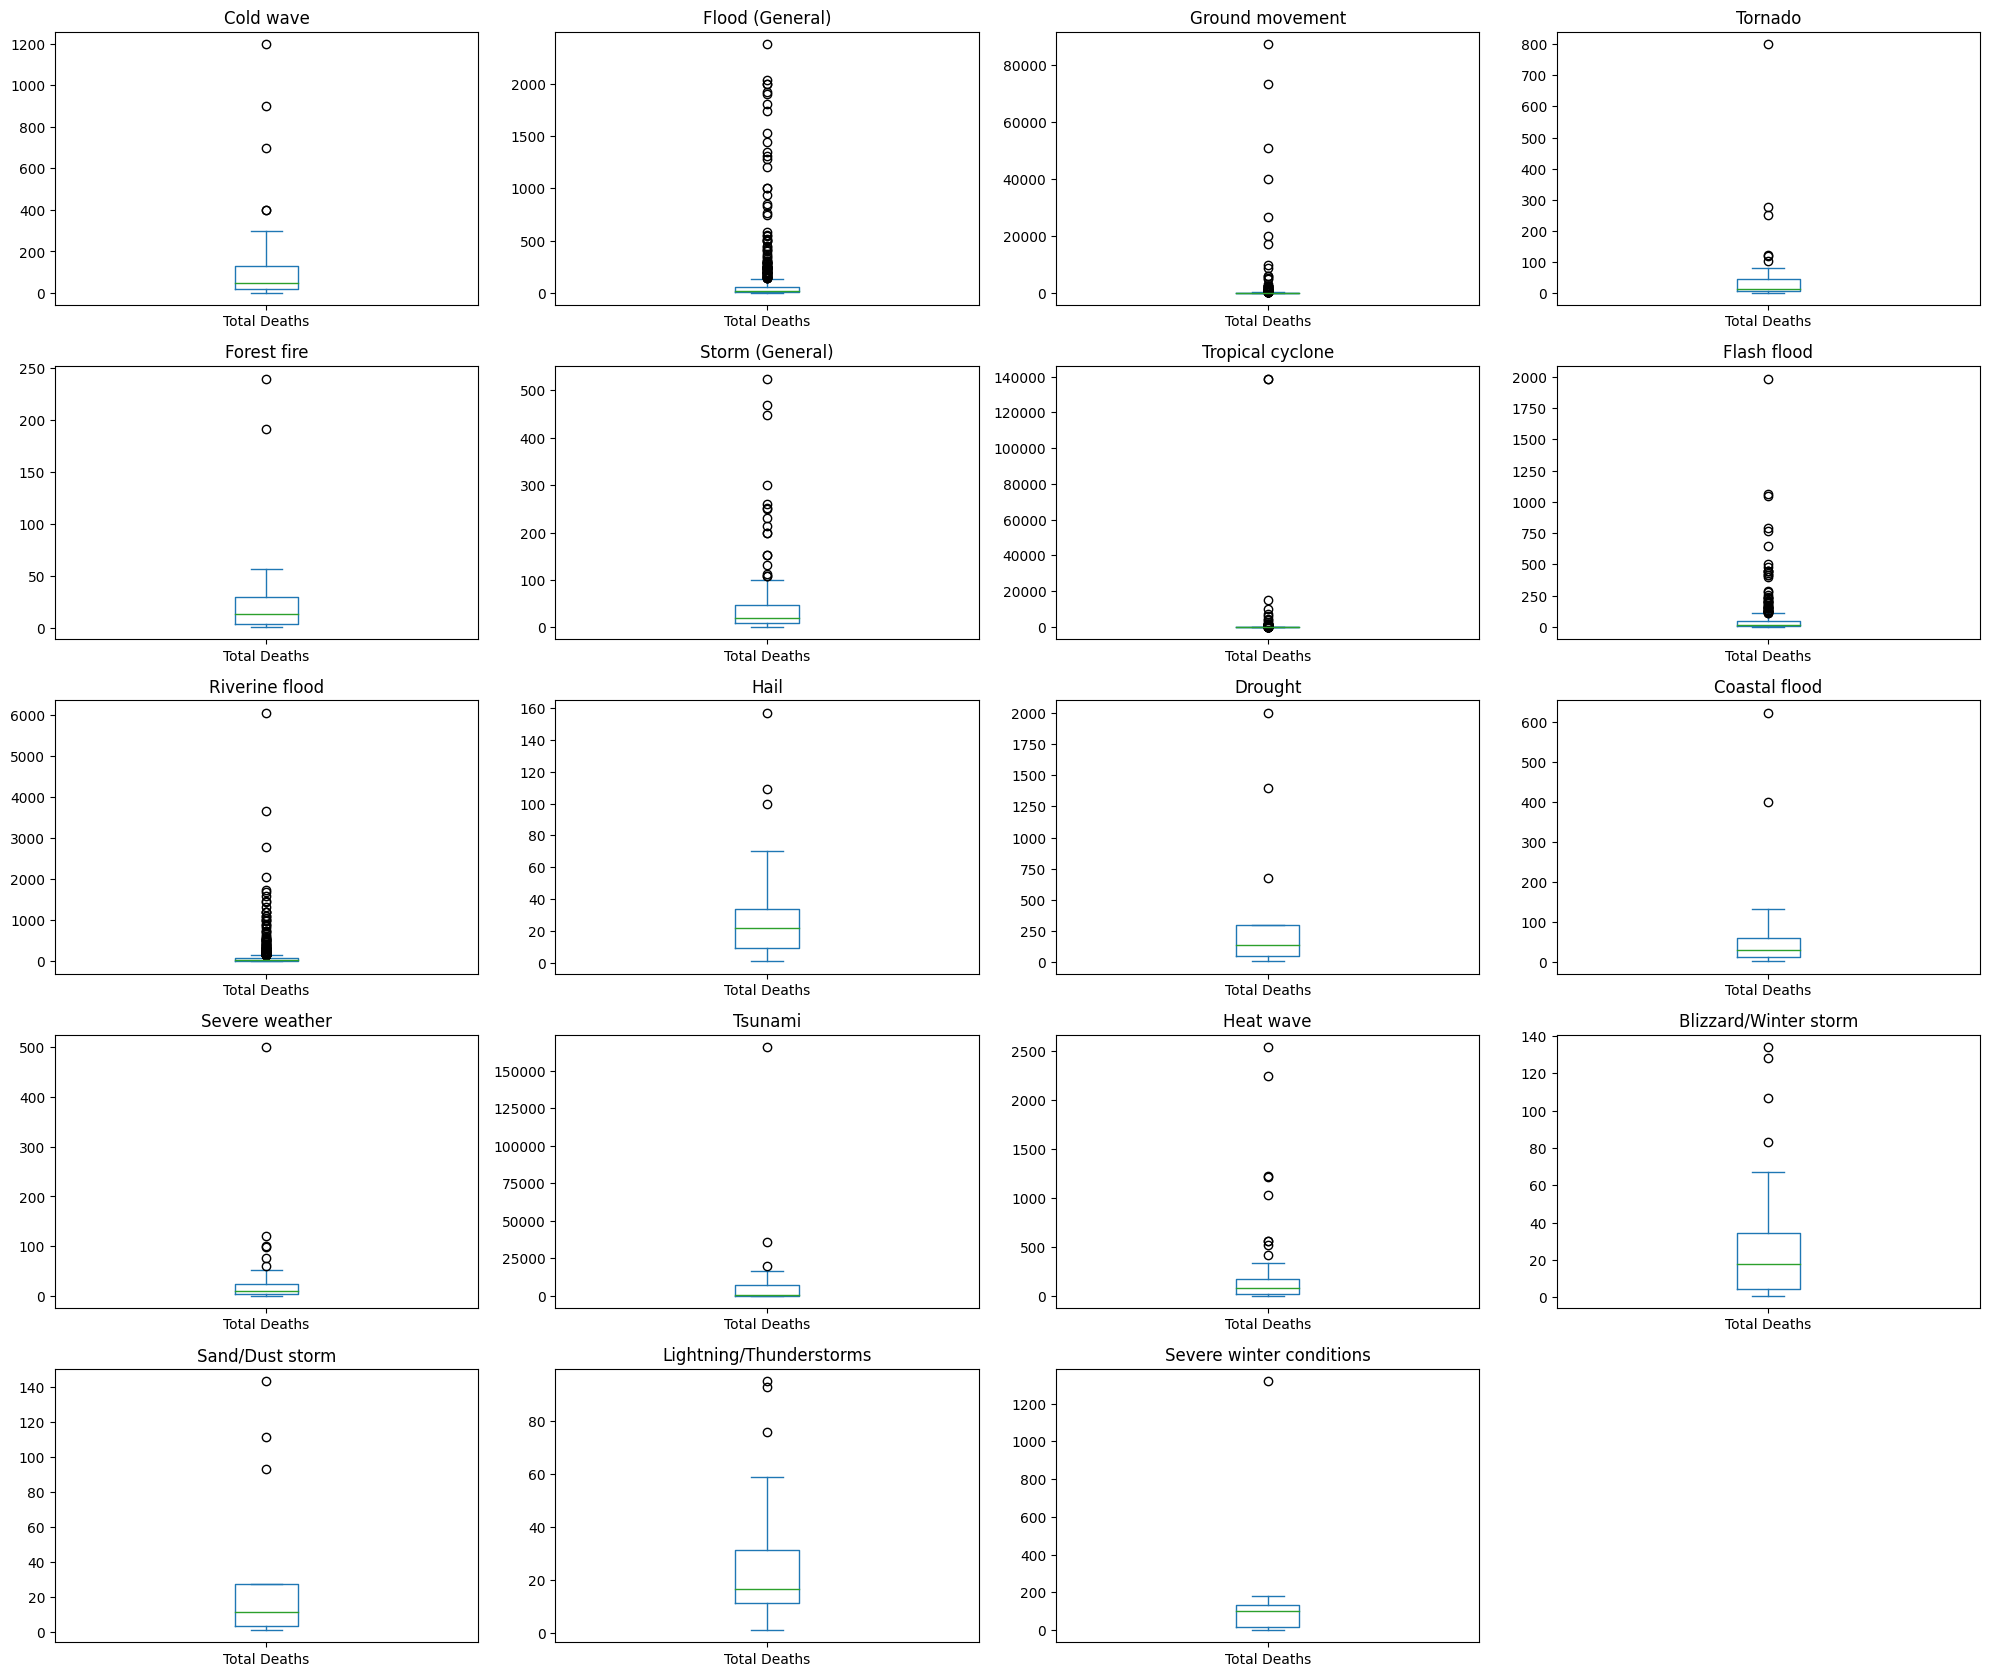

In [680]:
# Creating boxplots to visualize the value range of Total Deaths according to Disaster Subtype
plt.figure(figsize=(20,30))

for index,column in enumerate(filtered_df["Disaster Subtype"].unique()):
  plt.subplot(9,4,index+1)
  filtered_df[filtered_df["Disaster Subtype"] == column]["Total Deaths"].plot(kind = "box")
  plt.title(column)
  plt.tight_layout()

In [681]:
# Filling the null values of the death column with median value
for column in filtered_df["Disaster Subtype"].unique():
    print(column)
    median_deaths = filtered_df[filtered_df["Disaster Subtype"] == column]["Total Deaths"].median()
    print(median_deaths)
    filtered_df.loc[
        (filtered_df["Disaster Subtype"] == column) & (filtered_df["Total Deaths"].isna()), "Total Deaths"
    ] = median_deaths

Cold wave
50.0
Flood (General)
17.0
Ground movement
9.0
Tornado
12.0
Forest fire
13.0
Storm (General)
19.0
Tropical cyclone
18.0
Flash flood
20.5
Riverine flood
27.0
Hail
22.0
Drought
138.5
Coastal flood
29.0
Severe weather
11.0
Tsunami
170.5
Heat wave
80.0
Blizzard/Winter storm
18.0
Sand/Dust storm
11.0
Lightning/Thunderstorms
16.5
Severe winter conditions
100.0


In [682]:
# Check if there are any more null values in the Total Deaths column
filtered_df.isna().sum()

Disaster Subgroup      0
Disaster Type          0
Disaster Subtype       0
ISO                    0
Country                0
Subregion              0
Magnitude              0
Magnitude Scale        0
Start Year             0
Total Deaths           0
Total Affected       787
CPI                  482
dtype: int64

### Handling the missing values in `Total Affected` column

In [683]:
filtered_df.isna().sum()

Disaster Subgroup      0
Disaster Type          0
Disaster Subtype       0
ISO                    0
Country                0
Subregion              0
Magnitude              0
Magnitude Scale        0
Start Year             0
Total Deaths           0
Total Affected       787
CPI                  482
dtype: int64

In [684]:
# filling the null values for total affected column
for column in filtered_df["Disaster Subtype"].unique():
    print(column)
    median_affected = filtered_df[filtered_df["Disaster Subtype"] == column]["Total Affected"].median()
    print(median_affected)
    filtered_df.loc[
        (filtered_df["Disaster Subtype"] == column) & (filtered_df["Total Affected"].isna()), "Total Affected"
    ] = median_affected

Cold wave
30000.0
Flood (General)
25000.0
Ground movement
7004.5
Tornado
4314.0
Forest fire
2140.0
Storm (General)
3475.0
Tropical cyclone
40026.0
Flash flood
10000.0
Riverine flood
45023.0
Hail
13000.0
Drought
2350000.0
Coastal flood
24033.0
Severe weather
4283.0
Tsunami
25319.0
Heat wave
470.0
Blizzard/Winter storm
7633.0
Sand/Dust storm
900.0
Lightning/Thunderstorms
11006.0
Severe winter conditions
12000.0


In [685]:
# checking if filling is successfull
filtered_df.isna().sum()

Disaster Subgroup      0
Disaster Type          0
Disaster Subtype       0
ISO                    0
Country                0
Subregion              0
Magnitude              0
Magnitude Scale        0
Start Year             0
Total Deaths           0
Total Affected         0
CPI                  482
dtype: int64

In [686]:
filtered_df.shape

(4836, 12)

### Handling the missing values in `CPI` column

In [687]:
# Dropping rows where CPI is na
filtered_df.dropna(subset=["CPI"], inplace=True)

<ipython-input-687-307d798b3eaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=["CPI"], inplace=True)


In [688]:
filtered_df.isna().sum()

Disaster Subgroup    0
Disaster Type        0
Disaster Subtype     0
ISO                  0
Country              0
Subregion            0
Magnitude            0
Magnitude Scale      0
Start Year           0
Total Deaths         0
Total Affected       0
CPI                  0
dtype: int64

In [689]:
filtered_df

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Magnitude,Magnitude Scale,Start Year,Total Deaths,Total Affected,CPI
1088,Meteorological,Extreme temperature,Cold wave,IND,India,Southern Asia,0.000,°C,1981,300.0,30000.0,13.112547
1089,Hydrological,Flood,Flood (General),PHL,Philippines,South-eastern Asia,28897.025,Km2,1981,228.0,300000.0,13.082599
1091,Geophysical,Earthquake,Ground movement,IDN,Indonesia,South-eastern Asia,6.800,Richter,1981,306.0,2682.0,12.265909
1093,Hydrological,Flood,Flood (General),YMD,People's Democratic Republic of Yemen,Western Asia,28897.025,Km2,1981,17.0,12000.0,29.840662
1095,Climatological,Wildfire,Forest fire,MMR,Myanmar,South-eastern Asia,100.000,Km2,1981,8.0,48588.0,0.318445
...,...,...,...,...,...,...,...,...,...,...,...,...
6246,Hydrological,Flood,Flood (General),IDN,Indonesia,South-eastern Asia,28897.025,Km2,2022,1.0,3210.0,4.209464
6247,Climatological,Drought,Drought,CHN,China,Eastern Asia,6745.500,Km2,2022,138.5,6100000.0,1.973576
6304,Meteorological,Storm,Tropical cyclone,TWN,Taiwan (Province of China),Eastern Asia,150.000,Kph,2023,1.0,40026.0,100.000000
6340,Meteorological,Storm,Tropical cyclone,TWN,Taiwan (Province of China),Eastern Asia,150.000,Kph,2023,1.0,40026.0,100.000000


In [690]:
filtered_df.dtypes

Disaster Subgroup     object
Disaster Type         object
Disaster Subtype      object
ISO                   object
Country               object
Subregion             object
Magnitude            float64
Magnitude Scale       object
Start Year             int64
Total Deaths         float64
Total Affected       float64
CPI                  float64
dtype: object

In [691]:
filtered_df.to_csv("Preprocessed_data.csv")